In [1]:
from sklearn import preprocessing
import numpy as np

def generate_random(mean1, cov1, mean2, cov2, num_pts=1000, seed=0):
    np.random.seed(seed)
    
    X1 = np.random.multivariate_normal(mean1, cov1, num_pts)
    X2 = np.random.multivariate_normal(mean2, cov2, num_pts)
    
    return X1, X2

def generate_lipton(scale=True, num_pts=1000, seed=0):
    '''
    Synthetic data used by Lipton et al. in arXiv:1711.07076
    '''
    np.random.seed(seed)
    work_exp_m = np.random.poisson(31, size=num_pts) - np.random.normal(20, 0.2, size=num_pts)
    work_exp_f = np.random.poisson(25, size=num_pts) - np.random.normal(20, 0.2, size=num_pts)
    
    np.random.seed(seed+1)
    hair_len_m = 35 * np.random.beta(2, 7, size=num_pts)
    hair_len_f = 35 * np.random.beta(2, 2, size=num_pts)
    
    #np.random.seed(seed+2)
    ym = np.random.uniform(size=num_pts) < 1 / (1 + np.exp(25.5 - 2.5*work_exp_m))
    yf = np.random.uniform(size=num_pts) < 1 / (1 + np.exp(25.5 - 2.5*work_exp_f))
    
    if scale: #scale the input attributes to zero mean and unit variance
        work_exp = np.concatenate((work_exp_m, work_exp_f))
        work_exp = preprocessing.scale(work_exp)
        work_exp_m = work_exp[:num_pts]
        work_exp_f = work_exp[num_pts:]
        hair_len = np.concatenate((hair_len_m, hair_len_f))
        hair_len = preprocessing.scale(hair_len)
        hair_len_m = hair_len[:num_pts]
        hair_len_f = hair_len[num_pts:]
    
    #combine the input attributes to create the input matrix
    Xm = np.stack((work_exp_m, hair_len_m), axis=1)
    Xf = np.stack((work_exp_f, hair_len_f), axis=1)
    columns = ['work_exp', 'hair_len']
    
    return Xm, Xf, ym, yf, columns


In [2]:
Xm, Xf, ym, yf, columns = generate_lipton(scale=False, num_pts=1000, seed=0)

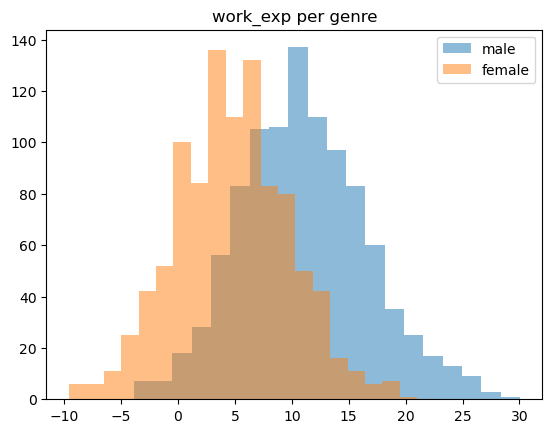

In [3]:
import matplotlib.pyplot as plt

plt.title('work_exp per genre')
plt.hist(Xm[:,0], bins=20, alpha=0.5, label='male')
plt.hist(Xf[:,0], bins=20, alpha=0.5, label='female')
plt.legend()

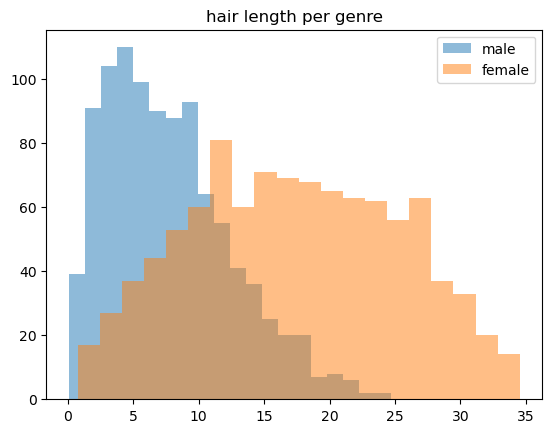

In [11]:
import matplotlib.pyplot as plt

plt.title('hair length per genre')
plt.hist(Xm[:,1], bins=20, alpha=0.5, label='male')
plt.hist(Xf[:,1], bins=20, alpha=0.5, label='female')
plt.legend()

In [ ]:
print('Difference between male and female work experience means (years):', round(np.mean(Xm[:,0]) - np.mean(Xf[:,0]), 2))


Mean difference between male and female work experience (years): 6.27


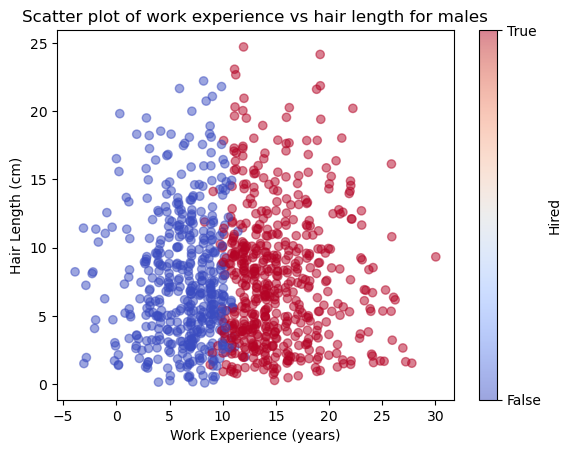

In [ ]:
plt.title('Scatter plot of work experience vs hair length for males')
plt.xlabel('Work Experience (years)')
plt.ylabel('Hair Length (cm)')
scatter = plt.scatter(Xm[:,0], Xm[:,1], c=ym, cmap='coolwarm', alpha=0.5)
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.ax.set_yticklabels(['False', 'True'])
cbar.set_label('Hired')


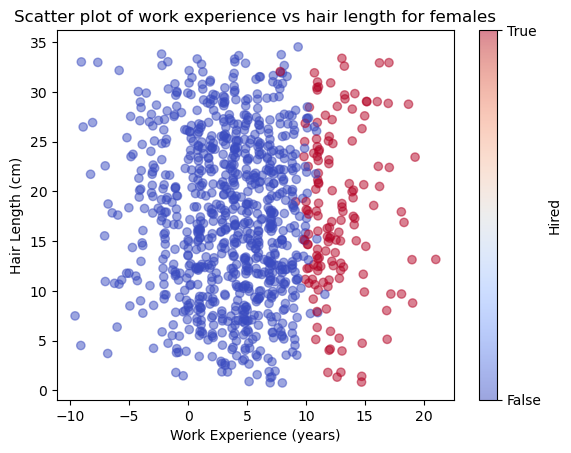

In [20]:
plt.title('Scatter plot of work experience vs hair length for females')
plt.xlabel('Work Experience (years)')
plt.ylabel('Hair Length (cm)')
scatter = plt.scatter(Xf[:,0], Xf[:,1], c=yf, cmap='coolwarm', alpha=0.5)
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.ax.set_yticklabels(['False', 'True'])
cbar.set_label('Hired')


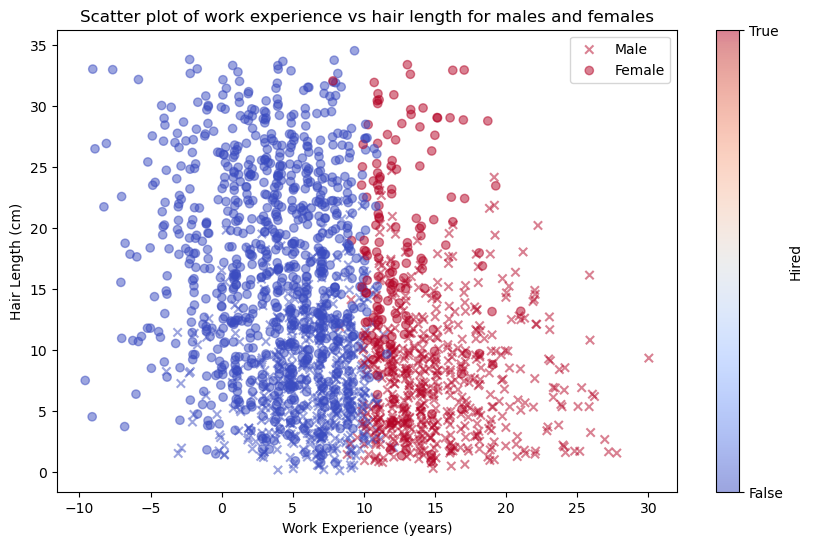

In [25]:
import matplotlib.pyplot as plt

# Create figure and axis labels
plt.figure(figsize=(10, 6))
plt.title('Scatter plot of work experience vs hair length for males and females')
plt.xlabel('Work Experience (years)')
plt.ylabel('Hair Length (cm)')

# Plot male data with square markers
scatter_male = plt.scatter(Xm[:, 0], Xm[:, 1], c=ym, cmap='coolwarm', alpha=0.5, marker='x', label='Male')

# Plot female data with circle markers
scatter_female = plt.scatter(Xf[:, 0], Xf[:, 1], c=yf, cmap='coolwarm', alpha=0.5, marker='o', label='Female')

# Add color bar to indicate outcome
cbar = plt.colorbar(scatter_male, ticks=[0, 1])
cbar.ax.set_yticklabels(['False', 'True'])
cbar.set_label('Hired')

# Add legend to distinguish male and female data
plt.legend(loc='upper right')

# Show plot
plt.show()
